<a href="https://colab.research.google.com/github/donovansurgick/Trill.Don/blob/master/MyTFexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First Example (Python3)

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2208 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0962 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0694 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9770


[0.07710131257772446, 0.9769999980926514]

First example

NN model requires:
(1) Train Data (for model.fit())
(2) Validation Data (optional to model.fit())
(3) Test Data (for model.evaluate())

#IMAGE CLASSIFICATION

2.2.0-rc2
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


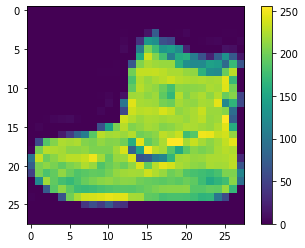

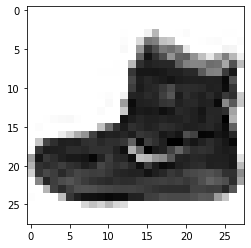

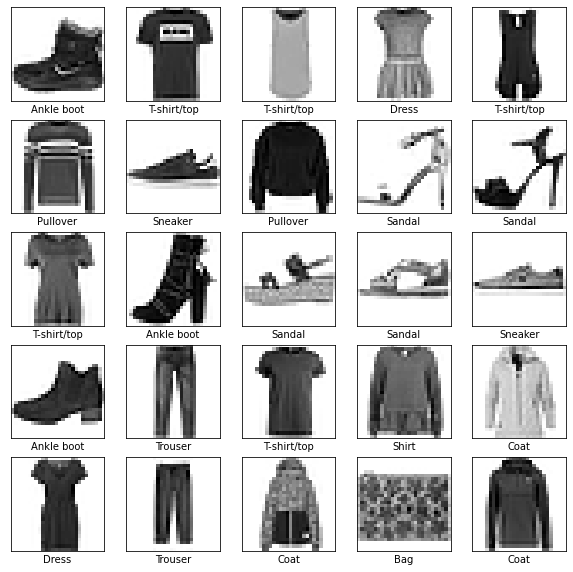

In [3]:
# Basic Classification Example (Python3)

# To make softmax sum to exactly 1
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

'''
We will use 60,000 images to train the network and 10,000 images to evaluate 
how accurately the network learned to classify images. 
You can access the Fashion MNIST into numpy arrays (60K train, 10K test):
'''
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

'''
Each image is 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 
The labels are an array of integers, ranging from 0 to 9 -- so, name them here:
'''
class_names = ['banjo', 'bass clarinet', 'basson', 'cello', 'clarient', 
               'contrabasson', 'cor anglais', 'double bass', 'flute', 'french horn']

# Now, Explore the loaded data (in numpy arrays)
print(train_images.shape) #this is (60000, 28, 28)
print(len(train_labels)) #this is 60000
print(train_labels) #this is array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

print(test_images.shape) #this is (10000, 28, 28)
print(len(test_labels)) #this is 10000

# See one of the actual data images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocessing Data
'''
We scale these values to a range of 0 to 1. 
For this, we divide the values by 255. 
It's important that the training set and the testing set are preprocessed in the same way:
'''
train_images = train_images / 255.0
test_images = test_images / 255.0

# See one of the actual data images
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) #see the second parameter
#plt.colorbar()
plt.grid(False)
plt.show()

# See 25 (train_images, train_labels)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


##Build, Compile, Train, and Evaluate an NN Model

In [0]:
# (1) BUILD An NN MODEL

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),      # Flatten 28x28 image
    keras.layers.Dense(128, activation=tf.nn.relu),  # Hidden layer fully connected (Dense)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 probable scores that sum to 1
])

In [0]:
# (2) COMPILE THE MODEL

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #accuracy - the correct answer rate

In [6]:
# (3) TRAIN THE MODEL

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4955 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8908


In [7]:
# (4) TEST (EVALUATE) THE MODEL
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

'''
See the accuracy on the test dataset is a less than the accuracy on the training dataset. 
This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their training data.
'''

313/313 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8634
Test accuracy: 0.8633999824523926


'\nSee the accuracy on the test dataset is a less than the accuracy on the training dataset. \nThis gap between training accuracy and test accuracy is an example of overfitting. \nOverfitting is when a machine learning model performs worse on new data than on their training data.\n'

##Use the Model (Prediction)

In [8]:
# How Use the trained NN model (Prediction)

# (1) product the softmax output
predictions = model.predict(test_images)
print(predictions[0]) # The 10 probable ranks that sum to 1 from the softmax layer 
print(np.sum(predictions[0])) #NOTE, this is not exactly 1 is the __future__ import is not included in the beginning

# (2) Take the maximum one
most_likely=np.argmax(predictions[0]) #argmax is the index to the max element
print(most_likely) 
print(class_names[most_likely])

[6.1369233e-06 6.7506477e-08 6.8984740e-08 1.2060589e-08 7.3330156e-08
 5.2914537e-02 4.7670451e-06 1.5875997e-02 1.7035698e-05 9.3118137e-01]
1.0000001
9
Ankle boot


##Visualize the Softmax Output

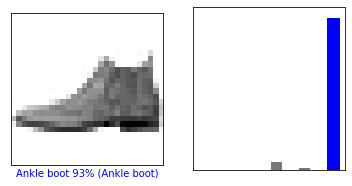

In [9]:
#NOW, Visualize Predictions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Visualize Predictions[0]
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1) # 1x2 plot grid and the first cell
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2) # 1x2 plot grid and the second cell
plot_value_array(i, predictions,  test_labels)
plt.show()



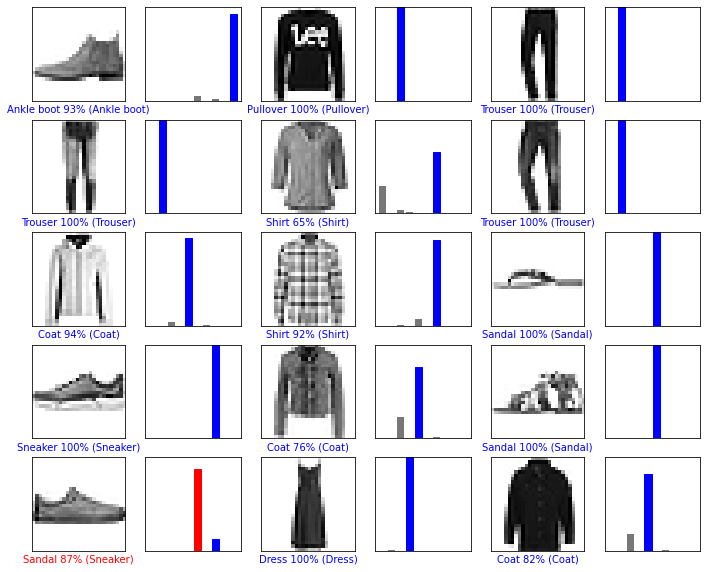

In [10]:
# Plot many test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images) # custom-made above
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels) # custom-made above
plt.show()

##How to make a prediction given a single image, not a whole batch

(28, 28)
(1, 28, 28)
[[6.1369183e-06 6.7506484e-08 6.8984619e-08 1.2060568e-08 7.3330163e-08
  5.2914448e-02 4.7670414e-06 1.5875991e-02 1.7035651e-05 9.3118149e-01]]
9
Ankle boot


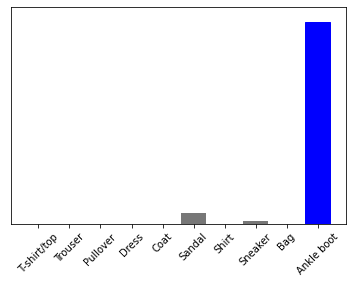

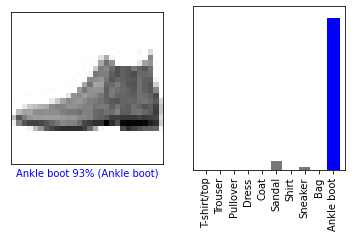

In [11]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)
most_likely=np.argmax(predictions_single)
print(most_likely) 
print(class_names[most_likely])


plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Visualize Predictions[0]
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1) # 1x2 plot grid and the first cell
plot_image(i, predictions_single, test_labels, test_images)
plt.subplot(1,2,2) # 1x2 plot grid and the second cell
plot_value_array(i, predictions_single,  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

In [12]:
# Preprocessing the Data

# Use the pad_sequences function to standardize the lengths of the reviews:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"], #seems not working
                                                        padding='post', #pre or post padding
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"], #seems not working
                                                       padding='post', #pre or post padding
                                                       maxlen=256)
print(len(train_data[0]), len(train_data[1]))
print(train_data[0])

print(len(test_data[0]), len(test_data[1]))
print(test_data[0])


NameError: ignored

In [0]:
# (1) Build an NN Model

# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000 #We know this because we deleted all other words in the keras.load_data()

model = keras.Sequential() # A typical NN model with layers stacked up
model.add(keras.layers.Embedding(vocab_size, 16)) # out=(batch, sequence, embedded_vec16) word to vec16
model.add(keras.layers.GlobalAveragePooling1D()) # out=(batch, pooled_vec16) sequence (review) to vec16
model.add(keras.layers.Dense(16, activation=tf.nn.relu)) # out=(batch, internal_vec16)
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid)) #out=(match, 1)

model.summary()

In [0]:
# (2) Compile the model

model.compile(optimizer='adam',
              loss='binary_crossentropy', # use mean_squared_error for regression or numerical prediction
              metrics=['acc'])

In [0]:
# (3) Train the model

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [0]:
# (4) Evaluate the trained model

results = model.evaluate(test_data, test_labels)
print(results)

In [0]:
# Visualization

history_dict = history.history #history was return by model.fit() in the training
print(history_dict.keys())

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# How to Use the trained NN model (Prediction)
print(test_labels)
predictions=model.predict(test_data)
print(predictions)

# Visualize first 50
answer=lambda a:a>0.5
answers=[answer(predictions[i,0]) for i in range(0,50)]
print(answers)
plt.plot(test_labels[0:50], 'rx', label='Truth')
#plt.plot(reviews, np.array(predictions[0:100,0]), 'go', label='Prediction')
plt.plot(answers, 'go', label='Prediction')
plt.title('Prediction Results')
plt.xlabel('Reviews')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# How to Use the trained NN model using a Single Input Text (sequence)
data=np.expand_dims(test_data[1],0)
prediction=model.predict(data)
answer=lambda a:a>0.5
print("\n",prediction,":",answer(prediction))


##Overfitting
Validations seem to peak after about twenty epochs. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. Later, you'll see how to do this automatically with a callback.

In [0]:
# Use seaborn for pairplot
!pip install -q seaborn

from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

In [0]:
# Download CVS Data

dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

In [0]:
# Load CVS into Pandas (pandas.read_cvs())

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset.tail())

# Delete rows containing NA (unknown value)
print("\n",dataset.isna().sum())
print(len(dataset)," before-cleaning rows")
dataset = dataset.dropna()
print("\n",dataset.isna().sum())
print(len(dataset)," after-cleaning rows")

#Replace Origin into one-hot vector of <USA, Europe, Japan>
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
print(dataset.tail())

In [0]:
# Preprocessing Data
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Inspect Data
print(train_dataset.describe())
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
print(train_stats)

# Joint Distribution
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

# Prepare target data (label)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# Normalize data values
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print(normed_train_data.tail())


In [0]:
# Prepare the model

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

model = build_model()
model.summary()

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print(example_result)

In [0]:
# Train the model
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.',end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [0]:
# Test the model
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])



In [0]:
#plt.clf()   # clear figure

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")